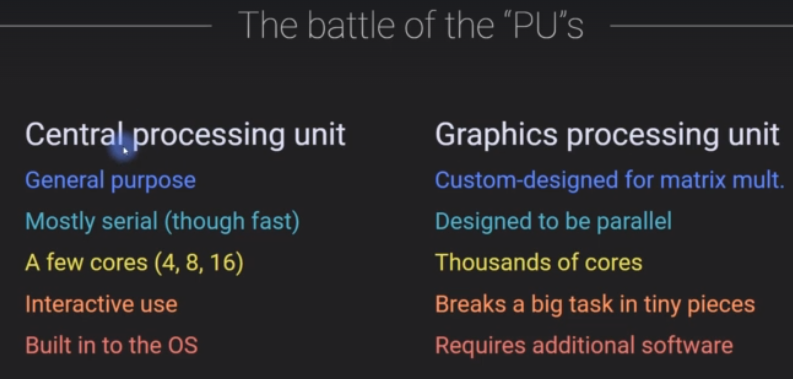

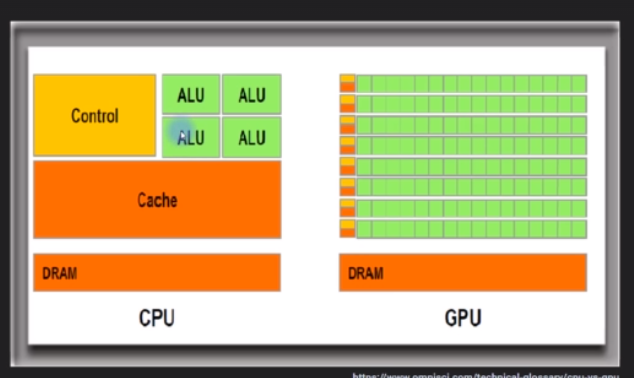

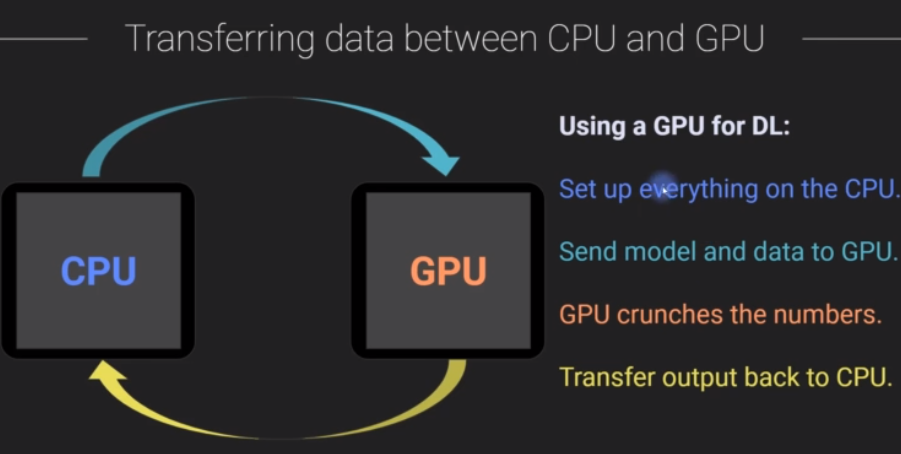

# Implementation

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import time

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [5]:
# building a simple model

net = nn.Sequential(
    nn.Linear(20, 100),
    nn.ReLU(),
    nn.Linear(100, 500),
    nn.ReLU(),
    nn.Linear(500, 30),
    nn.ReLU(),
    nn.Linear(30, 2)
)

In [6]:
# making some data
data = torch.randn((1000, 20)) # sample X features
labels = torch.randint(low=0, high=2, size=(1,1000))

## Sending model and data to GPU

In [7]:
# model
net.to(device)

# data
data = data.to(device)
labels = labels.to(device)

In [8]:
data

tensor([[ 0.5585, -0.2782,  0.7056,  ..., -0.1262, -1.3090, -1.6151],
        [-2.6254, -1.7487, -0.9701,  ...,  0.4912,  0.4232,  1.6527],
        [ 2.0626,  0.5731,  0.4609,  ..., -1.1529, -0.4291,  0.6142],
        ...,
        [ 0.8048,  0.4648, -1.1567,  ..., -1.4549,  1.0676,  0.5598],
        [ 0.7153, -0.5044, -2.6301,  ...,  0.3303,  2.1487,  0.6442],
        [-0.0719,  0.0971,  0.4128,  ...,  0.3398, -2.0090, -1.7111]],
       device='cuda:0')

In [15]:
# accessing data directly on GPU

dataG = torch.randn((1000, 20), device=device) # accessing cuda
dataC = torch.randn((1000, 20), device='cpu') # accessing on cpu

print(data.device, dataG.device, dataC.device)

cuda:0 cuda:0 cpu


In [16]:
# getting results from model

op = net(data)
op.device

device(type='cuda', index=0)

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

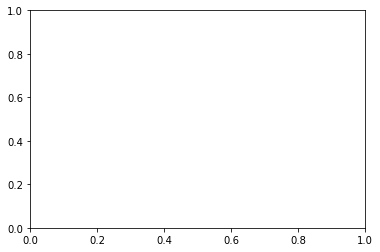

In [17]:
# doesn't work as data is on GPU
plt.plot(op.detach())

device(type='cuda', index=0)

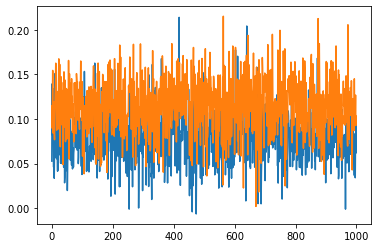

In [21]:
# have to bring it to cpu, however, op is still on GPU
plt.plot(op.detach().cpu())
op.detach().device

In [22]:
# checking process time

start = time.process_time()

# moving, running, retrieving
device = 'cuda'
net.to(device)
data = data.to(device)
labels = labels.to(device)
op = net(data).detach().cpu()

GPUtime = 1000*(time.process_time() - start)

In [23]:
# checking process time

start = time.process_time()

# moving, running, retrieving
device = 'cpu'
net.to(device)
data = data.to(device)
labels = labels.to(device)
op = net(data).detach().cpu()

CPUtime = 1000*(time.process_time() - start)

In [24]:
GPUtime, CPUtime

(22.605210000000042, 48.617458000000724)

In [25]:
# recreating everything to run on cpu (default)

net = nn.Sequential(
    nn.Linear(20, 100),
    nn.ReLU(),
    nn.Linear(100, 500),
    nn.ReLU(),
    nn.Linear(500, 30),
    nn.ReLU(),
    nn.Linear(30, 2)
)

data = torch.randn((1000, 20)) # sample X features

start = time.process_time()
op = net(data).detach()

CPUtime2 = 1000*(time.process_time() - start)

In [26]:
GPUtime, CPUtime, CPUtime2

(22.605210000000042, 48.617458000000724, 16.71678700000001)